In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Price_Data.csv', sep=";", encoding='ISO-8859-1')
df.head()

,ArticleNumber,ValidFrom,ValidUntil,Price
0,38010,2021-12-25 00:00:00,2022-01-01 23:59:59,"0,99"
1,38010,2022-01-02 00:00:00,2022-01-08 23:59:59,"0,89"
2,38010,2022-01-09 00:00:00,2022-01-12 23:59:59,"0,99"
3,38010,2022-01-13 00:00:00,2022-01-15 23:59:59,"0,88"
4,38010,2022-01-16 00:00:00,2022-01-22 23:59:59,"0,88"


In [2]:
df.ArticleNumber.unique()

array([ 38010,  46150,  46272, 415768, 415786, 419726, 419727, 421791,
       430923, 435066, 440388, 440853])

In [3]:
broetchen = df[(df.ArticleNumber==415768) | (df.ArticleNumber==440388) | (df.ArticleNumber==415786)]
broetchen

,ArticleNumber,ValidFrom,ValidUntil,Price
118,415768,2021-12-29 00:00:00,2022-01-01 23:59:59,"0,15"
119,415768,2022-01-02 00:00:00,2022-01-15 23:59:59,"0,15"
120,415768,2022-01-16 00:00:00,2022-01-22 23:59:59,"0,15"
121,415768,2022-01-23 00:00:00,2022-02-05 23:59:59,"0,15"
122,415768,2022-02-06 00:00:00,2022-02-12 23:59:59,"0,15"
...,...,...,...,...
240,440388,2022-09-11 00:00:00,2022-09-24 23:59:59,"0,17"
241,440388,2022-09-25 00:00:00,2022-10-01 23:59:59,"0,17"
242,440388,2022-10-02 00:00:00,2022-10-15 23:59:59,"0,17"
243,440388,2022-10-16 00:00:00,2022-10-16 23:59:59,"0,17"


In [4]:
broetchen.Price.value_counts()

0,17    32
0,15    31
0,12     2
Name: Price, dtype: int64

In [5]:
price_12 = broetchen[broetchen.Price == '0,12']
price_15 = broetchen[broetchen.Price == '0,15']
price_17 = broetchen[broetchen.Price == '0,17']

In [6]:
price_12.ValidFrom = pd.to_datetime(price_12.ValidFrom)
price_12.ValidUntil = pd.to_datetime(price_12.ValidUntil)

price_15.ValidFrom = pd.to_datetime(price_15.ValidFrom)
price_15.ValidUntil = pd.to_datetime(price_15.ValidUntil)

price_17.ValidFrom = pd.to_datetime(price_17.ValidFrom)
price_17.ValidUntil = pd.to_datetime(price_17.ValidUntil)

/Users/ken/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [7]:
df = pd.read_csv("windel.csv")
df.Date = pd.to_datetime(df.Date)
df.head()

,Unnamed: 0,Unnamed: 0.1,Date,StoreNumber,CashRegisterNumber,ReceiptNumber,ReceiptRowNumber,Time,ArticleNumber,ArticleName,Quantity,Timestamp,Month,Day,Hour
0,145008,150090,2022-01-04,1303,2,933,3,17:03:58,425603,Babys.Windel 5Junior 33ST,1.0,2022-01-04 17:03:58,1,1,17
1,333456,344645,2022-01-07,1053,2,772,1,18:55:24,425609,Babyso.Windel 3 Midi 45ST,1.0,2022-01-07 18:55:24,1,4,18
2,598285,618199,2022-01-10,1417,1,145,12,19:05:00,425598,Babys.Windeln 4 Maxi 38ST,1.0,2022-01-10 19:05:00,1,0,19
3,964579,995660,2022-01-14,1303,1,798,1,17:23:52,425603,Babys.Windel 5Junior 33ST,1.0,2022-01-14 17:23:52,1,4,17
4,1052182,1086061,2022-01-15,1033,3,421,2,15:42:42,754715,Windel Sockenstiefel102g,1.0,2022-01-15 15:42:42,1,5,15


In [8]:
df['price'] = None

for index, row in price_12.iterrows():
    valid_from_12 = row['ValidFrom']
    valid_until_12 = row['ValidUntil']
    df['price'][(df.Date>=valid_from_12) & (df.Date<=valid_until_12)] = 0.12


for index, row in price_15.iterrows():
    valid_from_15 = row['ValidFrom']
    valid_until_15 = row['ValidUntil']  
    df['price'][(df.Date>=valid_from_15) & (df.Date<=valid_until_15)] = 0.15


for index, row in price_17.iterrows():
    valid_from_17 = row['ValidFrom']
    valid_until_17 = row['ValidUntil']  
    df['price'][(df.Date>=valid_from_17) & (df.Date<=valid_until_17)] = 0.17

/var/folders/2d/vw4mfsfj3_7fckcg_nmtp2tc0000gn/T/ipykernel_50279/30849714.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][(df.Date>=valid_from_12) & (df.Date<=valid_until_12)] = 0.12
/var/folders/2d/vw4mfsfj3_7fckcg_nmtp2tc0000gn/T/ipykernel_50279/30849714.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][(df.Date>=valid_from_15) & (df.Date<=valid_until_15)] = 0.15
/var/folders/2d/vw4mfsfj3_7fckcg_nmtp2tc0000gn/T/ipykernel_50279/30849714.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

In [9]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,Date,StoreNumber,CashRegisterNumber,ReceiptNumber,ReceiptRowNumber,Time,ArticleNumber,ArticleName,Quantity,Timestamp,Month,Day,Hour,price
0,145008,150090,2022-01-04,1303,2,933,3,17:03:58,425603,Babys.Windel 5Junior 33ST,1.0,2022-01-04 17:03:58,1,1,17,0.15
1,333456,344645,2022-01-07,1053,2,772,1,18:55:24,425609,Babyso.Windel 3 Midi 45ST,1.0,2022-01-07 18:55:24,1,4,18,0.15
2,598285,618199,2022-01-10,1417,1,145,12,19:05:00,425598,Babys.Windeln 4 Maxi 38ST,1.0,2022-01-10 19:05:00,1,0,19,0.15
3,964579,995660,2022-01-14,1303,1,798,1,17:23:52,425603,Babys.Windel 5Junior 33ST,1.0,2022-01-14 17:23:52,1,4,17,0.15
4,1052182,1086061,2022-01-15,1033,3,421,2,15:42:42,754715,Windel Sockenstiefel102g,1.0,2022-01-15 15:42:42,1,5,15,0.15
5,1065460,1099733,2022-01-15,1098,1,687,9,19:45:52,425609,Babyso.Windel 3 Midi 45ST,1.0,2022-01-15 19:45:52,1,5,19,0.15
6,1586722,1637654,2022-01-21,1311,3,624,2,11:22:22,425609,Babyso.Windel 3 Midi 45ST,1.0,2022-01-21 11:22:22,1,4,11,0.15
7,1741684,1797712,2022-01-22,1504,2,467,1,14:36:44,425609,Babyso.Windel 3 Midi 45ST,1.0,2022-01-22 14:36:44,1,5,14,0.15
8,2336240,2411198,2022-01-29,1311,2,754,1,19:42:01,425609,Babyso.Windel 3 Midi 45ST,1.0,2022-01-29 19:42:01,1,5,19,0.15
9,2727806,2815096,2022-02-03,1303,2,204,2,17:36:57,425604,Babys.Windeln 6 XL 29ST,1.0,2022-02-03 17:36:57,2,3,17,0.15


In [10]:
df.shape

(770, 16)

In [11]:
df.price.unique()
uni_price = df.price.unique()
uni_price

array([0.15, 0.12, 0.17], dtype=object)

In [12]:
data = df.groupby('Date').agg({'price': 'first', 'Quantity': 'sum'}).reset_index()
data['6_quantity'] = data['Quantity'].rolling(window=6, min_periods=1).mean()
data['revenue'] = data['price']*data['6_quantity']
data.head()

,Date,price,Quantity,6_quantity,revenue
0,2022-01-04,0.15,1.0,1.0,0.15
1,2022-01-07,0.15,1.0,1.0,0.15
2,2022-01-10,0.15,1.0,1.0,0.15
3,2022-01-14,0.15,1.0,1.0,0.15
4,2022-01-15,0.15,2.0,1.2,0.18


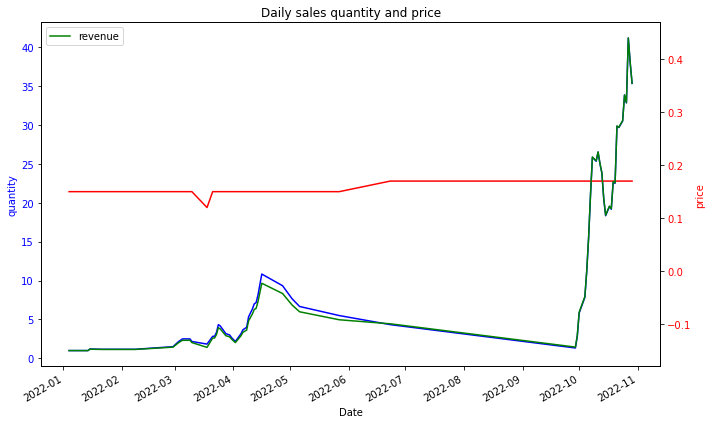

In [13]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(data['Date'], data['6_quantity'], color='blue', label='quantity')
ax1.set_xlabel("Date")
ax1.set_ylabel("quantity", color="blue")
ax1.tick_params(axis='y', labelcolor='blue')

ax2=ax1.twinx()
ax2.plot(data['Date'], data['price'], color='red', label='price')
ax2.set_ylabel('price', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(min(data['price'])-0.3, max(data['price'])+0.3)

ax3=ax1.twinx()
ax3.plot(data['Date'], data['revenue'], color='green', label='revenue')
ax3.set_label('revenue')
ax3.set_yticks([])

plt.legend()
plt.title("Daily sales quantity and price")

# 自动调整日期间隔
plt.gcf().autofmt_xdate()

# 显示图形
plt.tight_layout()
plt.show()

In [14]:
data.head()

,Date,price,Quantity,6_quantity,revenue
0,2022-01-04,0.15,1.0,1.0,0.15
1,2022-01-07,0.15,1.0,1.0,0.15
2,2022-01-10,0.15,1.0,1.0,0.15
3,2022-01-14,0.15,1.0,1.0,0.15
4,2022-01-15,0.15,2.0,1.2,0.18


In [15]:
from prophet import Prophet
# Defining the inputs
timestamp_var = "Date"
baseline_dep_var = "6_quantity"
changepoint_prior_scale_value = 0.5
# list_ind_vars_baseline = ['event_type_1_Cultural','event_type_1_National','event_type_1_Religious','event_type_1_Sporting']

In [16]:
data = data.rename(columns={timestamp_var: 'ds', baseline_dep_var: 'y'})
data.head()

,ds,price,Quantity,y,revenue
0,2022-01-04,0.15,1.0,1.0,0.15
1,2022-01-07,0.15,1.0,1.0,0.15
2,2022-01-10,0.15,1.0,1.0,0.15
3,2022-01-14,0.15,1.0,1.0,0.15
4,2022-01-15,0.15,2.0,1.2,0.18


In [17]:
# Preparing the datasecloset
data = data.rename(columns={timestamp_var:'ds', baseline_dep_var: 'y'})
# Initializing and fitting the model
model = Prophet(changepoint_prior_scale= changepoint_prior_scale_value) #Default changepoint_prior_scale = 0.05

# Add the regressor variables to the model
model.add_country_holidays(country_name='DE')
model.fit(data)

# Since we are only decomposing current time series, we will use same data is forecasting that was used for modelling
# Making predictions and extracting the level component
forecast = model.predict(data)
level_component = forecast['trend']

14:54:06 - cmdstanpy - INFO - Chain [1] start processing
14:54:08 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
level_component

0      0.108789
1      0.239814
2      0.370840
3      0.545541
4      0.589216
        ...    
65    32.311421
66    33.256983
67    34.202545
68    35.148107
69    36.093669
Name: trend, Length: 70, dtype: float64

In [19]:
x = data
x["intercept"] = 1
x = x[["intercept", "price", "y"]].values.T

actuals = x[2]

In [20]:
from scipy.optimize import minimize
import math

def objective(x0):
    return sum(((x[0]*x0[0] + x0[1]*np.log10(x[1])) - np.log10(actuals))**2)

x0 = [1, -1]
bounds = ((None, None), (-3, -0.5))

result = minimize(objective, x0, bounds=bounds, method="L-BFGS-B")

print(result)

price_elasticity = result.x[1]
data["price_elasticity"] = result.x[1]

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 18.363450197825916
        x: [ 3.538e-01 -5.000e-01]
      nit: 8
      jac: [ 3.553e-07 -1.583e+00]
     nfev: 33
     njev: 11
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


In [21]:
data.price_elasticity.unique()

array([-0.5])

In [22]:
data[data.price==0.17].count()

ds                  27
price               27
Quantity            27
y                   27
revenue             27
intercept           27
price_elasticity    27
dtype: int64

In [23]:
base_sales_df = data.tail(27).reset_index(drop=True)
base_sales_df['y'] = base_sales_df['y'].mean()
base_sales_df.rename(columns={"y":"base_units"}, inplace=True)
base_sales_df.head()

,ds,price,Quantity,base_units,revenue,intercept,price_elasticity
0,2022-06-23,0.17,1.0,21.858025,0.736667,1,-0.5
1,2022-09-29,0.17,1.0,21.858025,0.226667,1,-0.5
2,2022-09-30,0.17,12.0,21.858025,0.481667,1,-0.5
3,2022-10-01,0.17,19.0,21.858025,0.991667,1,-0.5
4,2022-10-04,0.17,13.0,21.858025,1.331667,1,-0.5


In [24]:
base_sales_df["LB_price"] = base_sales_df["price"] - (0.5*base_sales_df["price"])
base_sales_df["UB_price"] = base_sales_df["price"] + (2*base_sales_df["price"])
base_sales_df.head()

,ds,price,Quantity,base_units,revenue,intercept,price_elasticity,LB_price,UB_price
0,2022-06-23,0.17,1.0,21.858025,0.736667,1,-0.5,0.085,0.51
1,2022-09-29,0.17,1.0,21.858025,0.226667,1,-0.5,0.085,0.51
2,2022-09-30,0.17,12.0,21.858025,0.481667,1,-0.5,0.085,0.51
3,2022-10-01,0.17,19.0,21.858025,0.991667,1,-0.5,0.085,0.51
4,2022-10-04,0.17,13.0,21.858025,1.331667,1,-0.5,0.085,0.51


In [25]:
from scipy.optimize import minimize

# Define the objective function to be minimized
def objective_2(opti_price):
    base_sales_df["opti_price"] = opti_price
    base_sales_df["optimized_units"] = base_sales_df["base_units"] + (base_sales_df["base_units"]*\
                                                        ((base_sales_df["opti_price"]/base_sales_df["price"]) - 1)*\
                                                        (base_sales_df["price_elasticity"]))
    
    base_sales_df["optimized_revenue"] = base_sales_df["optimized_units"]*base_sales_df["opti_price"]
    
    return -sum(base_sales_df["optimized_revenue"])

# Define the initial guess
opti_price = base_sales_df["price"]
# Define the bounds for the variables
bounds = ((base_sales_df["LB_price"][0], base_sales_df["UB_price"][0]),)
print(opti_price[0])
print(bounds)
# # Use the optimization algorithm to minimize the objective function
result = minimize(objective_2, opti_price, bounds=bounds)

# Print the optimization result
print(result)

0.17
((0.085, 0.51),)
  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -112.86937500000003
        x: [ 2.550e-01  2.550e-01 ...  2.550e-01  2.550e-01]
      nit: 1
      jac: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
     nfev: 84
     njev: 3
 hess_inv: <27x27 LbfgsInvHessProduct with dtype=float64>


In [26]:
base_sales_df.head()

,ds,price,Quantity,base_units,revenue,intercept,price_elasticity,LB_price,UB_price,opti_price,optimized_units,optimized_revenue
0,2022-06-23,0.17,1.0,21.858025,0.736667,1,-0.5,0.085,0.51,0.255,16.393519,4.180347
1,2022-09-29,0.17,1.0,21.858025,0.226667,1,-0.5,0.085,0.51,0.255,16.393519,4.180347
2,2022-09-30,0.17,12.0,21.858025,0.481667,1,-0.5,0.085,0.51,0.255,16.393519,4.180347
3,2022-10-01,0.17,19.0,21.858025,0.991667,1,-0.5,0.085,0.51,0.255,16.393519,4.180347
4,2022-10-04,0.17,13.0,21.858025,1.331667,1,-0.5,0.085,0.51,0.255,16.393519,4.180347


In [27]:
base_sales_df['opti_price'] = round(base_sales_df['opti_price'], 2)
base_sales_df.head()

,ds,price,Quantity,base_units,revenue,intercept,price_elasticity,LB_price,UB_price,opti_price,optimized_units,optimized_revenue
0,2022-06-23,0.17,1.0,21.858025,0.736667,1,-0.5,0.085,0.51,0.25,16.393519,4.180347
1,2022-09-29,0.17,1.0,21.858025,0.226667,1,-0.5,0.085,0.51,0.25,16.393519,4.180347
2,2022-09-30,0.17,12.0,21.858025,0.481667,1,-0.5,0.085,0.51,0.25,16.393519,4.180347
3,2022-10-01,0.17,19.0,21.858025,0.991667,1,-0.5,0.085,0.51,0.25,16.393519,4.180347
4,2022-10-04,0.17,13.0,21.858025,1.331667,1,-0.5,0.085,0.51,0.25,16.393519,4.180347


In [28]:
print(base_sales_df.price[0])
print("Optimized price:", base_sales_df.opti_price[0])
print("recommended price change:", base_sales_df.opti_price[0] - base_sales_df.price[0])

0.17
Optimized price: 0.25
recommended price change: 0.07999999999999999


In [29]:
total_base_units = base_sales_df["base_units"].sum()
total_base_units

590.166666666667

In [30]:
total_opt_units = base_sales_df["optimized_units"].sum()
total_opt_units

442.62500308516843

In [31]:
ori_total_revenue = total_base_units * base_sales_df.price[0]
ori_total_revenue

100.32833333333339

In [32]:
opt_total_revenue = base_sales_df.optimized_revenue.sum()
opt_total_revenue

112.86937500000002

In [33]:
(result.x[0] - base_sales_df.price[0]) / base_sales_df.price[0] * base_sales_df.price_elasticity[0]

-0.24999999368305315

In [34]:
total_base_units * (1-0.24999999999999997)

442.6250000000002

In [35]:
ori_total_revenue * (1-0.15)

85.27908333333338

In [36]:
for i in range(1, 51, 1):
    x = i / 100.0
    units_change = (x - base_sales_df.price[0]) / base_sales_df.price[0] * base_sales_df.price_elasticity[0]
    units = total_base_units * (1 + units_change)
    revenue = units * x
    if revenue >= ori_total_revenue * (1-0.15):
        print(x)

0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
